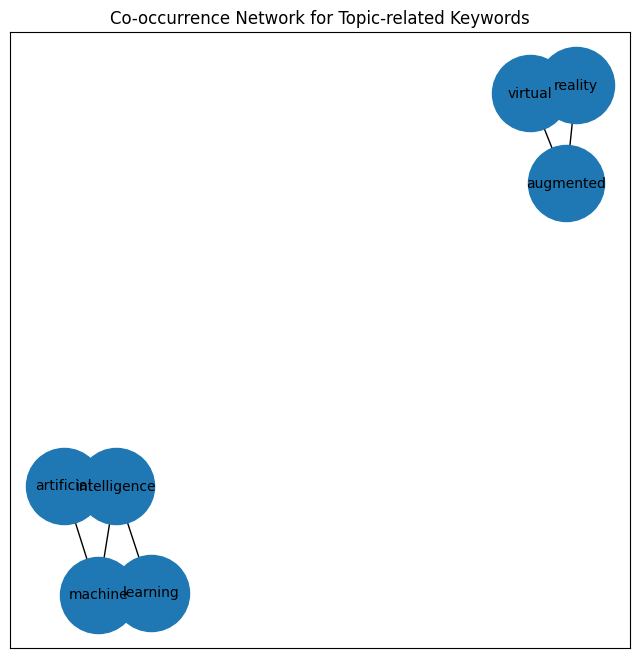

In [ ]:
# 示例文本：多个与科技相关的句子
text = """
Artificial intelligence and machine learning are driving innovation in technology.
Tech companies invest heavily in research and development.
Smartphones, cloud computing, and big data are reshaping communication.
Virtual reality and augmented reality bring new experiences to consumers.
"""
# 简单预处理：转换为小写并分词
words = text.lower().split()
def build_co_occurrence_matrix(words, window_size):
    vocab = sorted(set(words))
    word2idx = {word: idx for idx, word in enumerate(vocab)}
    size = len(vocab)
    matrix = np.zeros((size, size))
    for i, word in enumerate(words):
        start_index = max(i - window_size, 0)
        end_index = min(i + window_size + 1, len(words))
        for j in range(start_index, end_index):
            if i != j:
                matrix[word2idx[word], word2idx[words[j]]] += 1
    return matrix, vocab

# 构建共现矩阵，假设窗口大小取3
matrix_topic, vocab_topic = build_co_occurrence_matrix(words, window_size=3)
# 设定主题关键词
topic_keywords = {"artificial", "intelligence", "technology", "machine", "learning",
                    "cloud", "data", "smartphones", "virtual", "reality", "augmented"}

# 找出在词汇表中的位置（索引）
topic_indices = [idx for idx, word in enumerate(vocab_topic) if word in topic_keywords]

# 根据提取的索引，构建子矩阵
matrix_topic_sub = matrix_topic[np.ix_(topic_indices, topic_indices)]

# 对应的子词汇列表
vocab_topic_sub = [vocab_topic[idx] for idx in topic_indices]
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个图，设定阈值过滤低频共现（例如，共现次数至少为1）
G = nx.Graph()
threshold = 1

# 针对子词汇构建图
for i in range(len(topic_indices)):
    for j in range(i+1, len(topic_indices)):
        weight = matrix_topic_sub[i, j]
        if weight >= threshold:
            G.add_edge(vocab_topic_sub[i], vocab_topic_sub[j], weight=weight)

# 可视化网络图
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx(G, pos, with_labels=True, node_size=3000, font_size=10)
plt.title("Co-occurrence Network for Topic-related Keywords")
plt.show()
